# TEST claro_class.py

In [1]:
from claro_class import *

## Testing complete routine in Claro class

In [2]:
TDIR = 'C:\\Users\\MARTINA\\Desktop\\secondolotto_1\\'
PARAMS = {
    "DIRPATH"  : "*Station_1__*\Station_1__??_Summary\Chip_???\S_curve",
    "FILEPATH" : "Ch_*_offset_*_Chip_*.txt",
    "OUTFILE"  : "claro_files.txt",
    "OUTBAD"   : "bad_files.txt",
}

In [11]:
new = Claro(TDIR=TDIR, params=PARAMS, custom_n_files=100, log=False)

In [12]:
new.get_fileinfos()

Processing file n. 100... in: C:\Users\MARTINA\Desktop\secondolotto_1\Station_1__11\Station_1__11_Summary\Chip_012\S_curve\Ch_2_offset_0_Chip_012.txt. First word: error. Going on...

Process completed in 10.96 s.

Total number of files found: 100.
Total number of good files: 98. Output paths to good files are stored in claro_files.txt
Total number of bad files: 2 (2.0%) out of total). Output paths to bad files are stored in bad_files.txt


In [5]:
# Single.fit_erf(): (guesses:list='default', interactive=True, log=False, warnings_ignore=True, npoints=1000).
# Single.plot(): (npoints=1000, interactive=False, log=True, show_scatter=True, show_fit=True, show_transition=True, save=False, save_path='.\plot', save_format='pdf', show=True, **kwargs).

In [13]:
fit_dict = {'interactive' : False}
newdict = new.analysis_loop(fit_dict)

In [14]:
plot_dict = {'save' : True, 'save_dir':'.\Plot_loop\\'}
new.plot_loop(fit_dict, plot_dict)

In [15]:
new.plot_MultiPage(save=True,)

How many plots do you want per page? Allowed values are 1,2,3,4,6.  6


Process completed. Output file: aHundredPlots.pdf


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

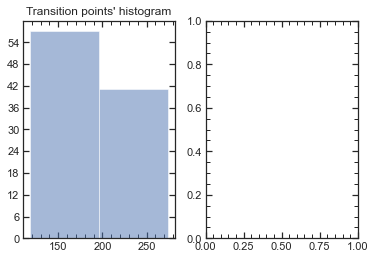

In [17]:
fig, ax = plt.subplots(1,2)
new.hist_tw(ax=ax, source='fit')

## Testing sub-routine for Single class

###### fig = plt.figure(figsize=(5,5))
single.plot()